[Load] reading CSV ...
[Shape] (3995321, 4)
[After clean] 3,995,321 samples


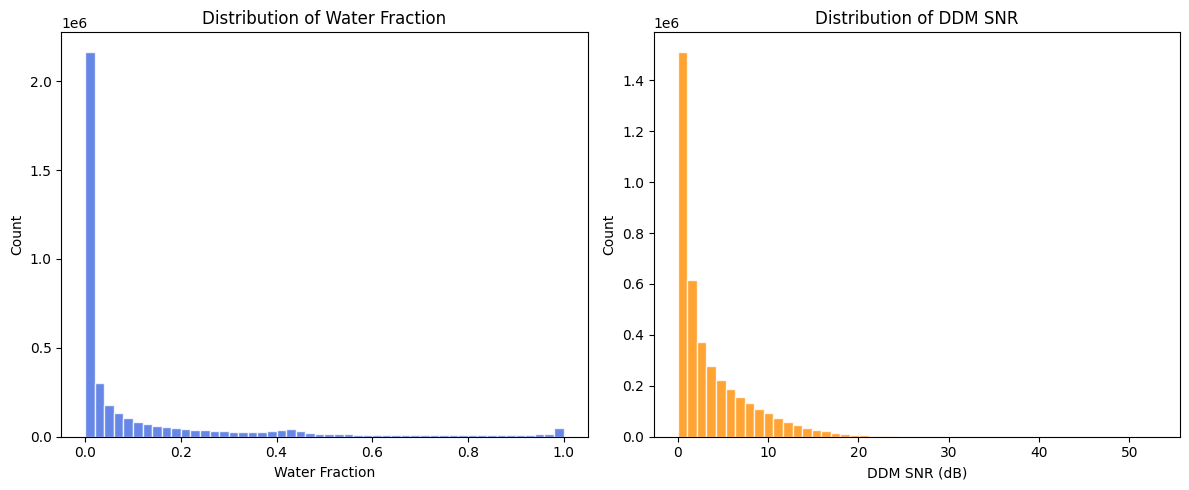

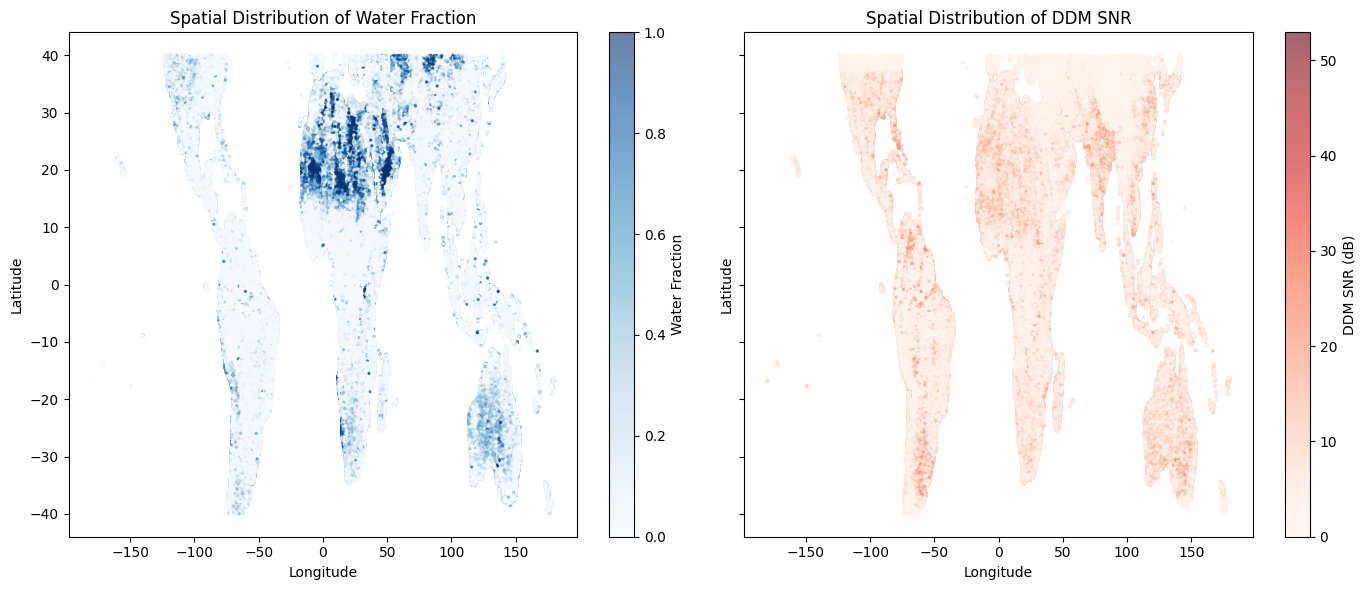

In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ====================================
PATH = "/mnt/cephfs-mount/chenchen/merged_with_era5_full_clear.csv"

print("[Load] reading CSV ...")
usecols = ["sp_lon", "sp_lat", "ddm_snr", "water_fraction"]
df = pd.read_csv(PATH, usecols=usecols, dtype=np.float32, low_memory=False)
print(f"[Shape] {df.shape}")

# ====================================
df = df.dropna(subset=["sp_lon", "sp_lat", "ddm_snr", "water_fraction"])
df = df[(df["water_fraction"] >= 0) & (df["water_fraction"] <= 1)]
df["ddm_snr"] = df["ddm_snr"].clip(0, 60)

print(f"[After clean] {len(df):,} samples")

# ==================Histogram ==================
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df["water_fraction"], bins=50, color="royalblue", alpha=0.8, edgecolor="white")
plt.xlabel("Water Fraction")
plt.ylabel("Count")
plt.title("Distribution of Water Fraction")

plt.subplot(1,2,2)
plt.hist(df["ddm_snr"], bins=50, color="darkorange", alpha=0.8, edgecolor="white")
plt.xlabel("DDM SNR (dB)")
plt.ylabel("Count")
plt.title("Distribution of DDM SNR")

plt.tight_layout()
plt.show()

# ====================================

df_plot = df

fig, axes = plt.subplots(1, 2, figsize=(14,6), sharex=True, sharey=True)
axes = axes.ravel()

# (a) water_fraction
sc1 = axes[0].scatter(df_plot["sp_lon"], df_plot["sp_lat"],
                      c=df_plot["water_fraction"], s=2, cmap="Blues", alpha=0.6)
axes[0].set_title("Spatial Distribution of Water Fraction")
axes[0].set_xlabel("Longitude"); axes[0].set_ylabel("Latitude")
cb1 = plt.colorbar(sc1, ax=axes[0]); cb1.set_label("Water Fraction")

# (b) ddm_snr
sc2 = axes[1].scatter(df_plot["sp_lon"], df_plot["sp_lat"],
                      c=df_plot["ddm_snr"], s=2, cmap="Reds", alpha=0.6)
axes[1].set_title("Spatial Distribution of DDM SNR")
axes[1].set_xlabel("Longitude"); axes[1].set_ylabel("Latitude")
cb2 = plt.colorbar(sc2, ax=axes[1]); cb2.set_label("DDM SNR (dB)")

plt.tight_layout()
plt.show()


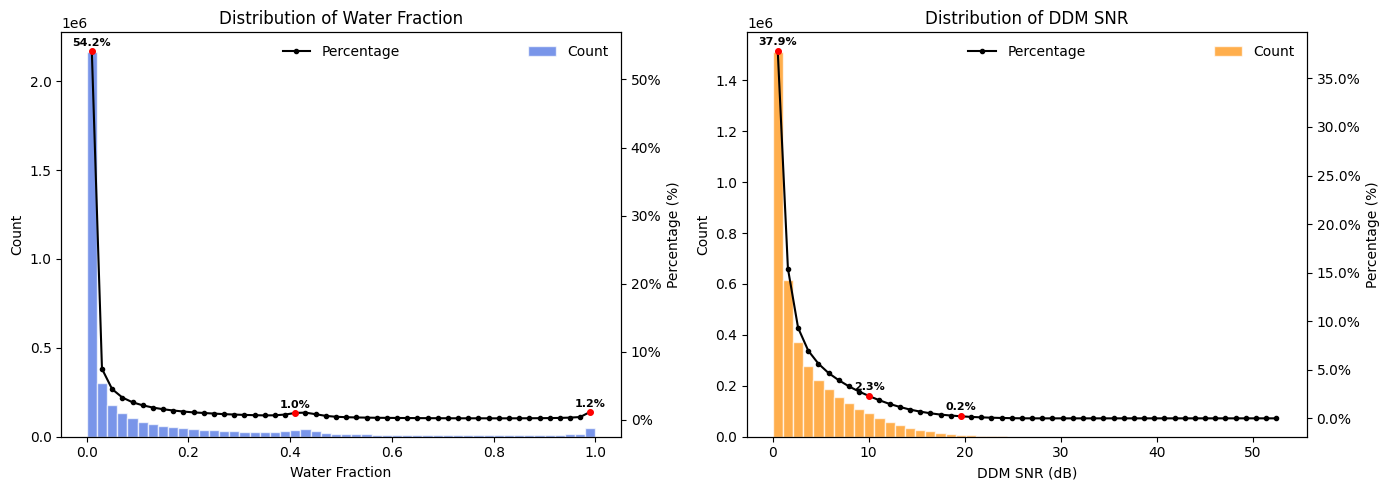

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


df = df[(df["water_fraction"]>=0)&(df["water_fraction"]<=1)]
df["ddm_snr"] = df["ddm_snr"].clip(0,60)

fig, axes = plt.subplots(1,2,figsize=(14,5))
axes = axes.ravel()

# =====  =====
def dual_hist(ax, data, bins, color, xlabel, title, highlight_bins=None):
    counts, bin_edges, _ = ax.hist(
        data, bins=bins, color=color, alpha=0.7,
        edgecolor='white', label='Count'
    )
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Count")
    ax.set_title(title)

    # 
    ax2 = ax.twinx()
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    percents = counts / counts.sum() * 100

    ax2.plot(bin_centers, percents, color='black', marker='o',
             markersize=3, linewidth=1.5, label='Percentage')
    ax2.set_ylabel("Percentage (%)")
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax2.grid(False)

    # ====  bins ====
    if highlight_bins is not None:
        for target in highlight_bins:
    
            idx = np.abs(bin_centers - target).argmin()
            x, y = bin_centers[idx], percents[idx]
            ax2.text(x, y + 0.4, f"{y:.1f}%",
                     ha='center', va='bottom', fontsize=8, weight='bold')
            ax2.plot(x, y, 'o', color='red', markersize=4, zorder=5)  

    ax.legend(loc='upper right', frameon=False)
    ax2.legend(loc='upper center', frameon=False)


dual_hist(
    axes[0], df["water_fraction"], bins=50,
    color="royalblue", xlabel="Water Fraction",
    title="Distribution of Water Fraction",
    highlight_bins=[0.0, 0.4, 1.0]   
)

dual_hist(
    axes[1], df["ddm_snr"], bins=50,
    color="darkorange", xlabel="DDM SNR (dB)",
    title="Distribution of DDM SNR",
    highlight_bins=[0, 10, 20]       
)

plt.tight_layout()
plt.show()
